# EDA датасета рецептур домашних пивоваров 

## Выгрузка датасета из диска:

In [1]:
import pandas as pd

FILE_ID = "15_7a8dD35xB1WMn5Vl6Z3yAfTIDX3jDh"  # ID файла на Google Drive
file_url = f"https://drive.google.com/uc?id={FILE_ID}"

raw_data = pd.read_csv(file_url, encoding= 'cp1251')    # читаем файл

raw_data.head(5)          # выводим на экран первые 10 строк для проверки

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [2]:
raw_data.shape # Определение количества строк и столбцов 

(73861, 23)

## Оценка структуры

### Приведение типов данных

In [3]:
raw_data.dtypes   

BeerID             int64
Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
dtype: object

In [4]:
raw_data['SugarScale']=raw_data['SugarScale'].astype('category') 
# Приведение колонки SugarScale к типу данных category


In [5]:
raw_data['BrewMethod']=raw_data['BrewMethod'].astype('category') 
# Приведение колонки BrewMethod к типу данных category


In [6]:
raw_data['Style']=raw_data['Style'].astype('category') 
# Приведение колонки Style к типу данных category


In [7]:
raw_data['PrimingMethod']=raw_data['PrimingMethod'].astype('category')
# Приведение колонки PrimingMethod к типу данных category


In [8]:
raw_data.dtypes # Проверка внесенных изменений 

BeerID              int64
Name               object
URL                object
Style            category
StyleID             int64
Size(L)           float64
OG                float64
FG                float64
ABV               float64
IBU               float64
Color             float64
BoilSize          float64
BoilTime            int64
BoilGravity       float64
Efficiency        float64
MashThickness     float64
SugarScale       category
BrewMethod       category
PitchRate         float64
PrimaryTemp       float64
PrimingMethod    category
PrimingAmount      object
UserId            float64
dtype: object

Name, URL, PrimingAmount не изменял, так как значения в них слишком хаотичные, включающие буквы и цифры, так что ни под Категории, ни под что-то еще они не подходят (но возможно я заблуждаюсь)

## Работа с пропусками и повторами

### Работа с пропусками

In [9]:
print("Пропуски по столбцам:")
print(raw_data.isnull().sum()) #выявление пропусков


Пропуски по столбцам:
BeerID               0
Name                 2
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67101
PrimingAmount    69087
UserId           50490
dtype: int64


Обратил внимание, что в столбцах MashThickness, PitchRate, PrimaryTemp, PrimingMethod, PrimingAmount очень большое количество пропусков. 

In [10]:
def missing_percent(column):
    total = len(column)
    missing = column.isnull().sum()
    return (missing / total) * 100
print(f"Процент пропусков в столбце MashThickness: {missing_percent(raw_data['MashThickness']):.2f}%")
print(f"Процент пропусков в столбце PitchRate: {missing_percent(raw_data['PitchRate']):.2f}%")
print(f"Процент пропусков в столбце PrimaryTemp: {missing_percent(raw_data['PrimaryTemp']):.2f}%")
print(f"Процент пропусков в столбце PrimingMethod: {missing_percent(raw_data['PrimingMethod']):.2f}%")
print(f"Процент пропусков в столбце PrimingAmount: {missing_percent(raw_data['PrimingAmount']):.2f}%")




Процент пропусков в столбце MashThickness: 40.43%
Процент пропусков в столбце PitchRate: 53.14%
Процент пропусков в столбце PrimaryTemp: 30.68%
Процент пропусков в столбце PrimingMethod: 90.85%
Процент пропусков в столбце PrimingAmount: 93.54%


Так как в столбцах MashThickness, PrimingMethod, PrimingAmount, PitchRate много пропусков, считаю допустимым их удалить из датасета. 

In [11]:
raw_data=raw_data.drop(['MashThickness','PitchRate', 'PrimingAmount', 'PrimingMethod'], axis=1)
raw_data.head(5)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,PrimaryTemp,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,Specific Gravity,All Grain,17.78,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,Specific Gravity,All Grain,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,Specific Gravity,extract,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,Specific Gravity,All Grain,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,Specific Gravity,All Grain,19.00,18325.0


Так как колонки URL, BeerID, UserId не несут полезной информации и в некоторых из них также много пропусков, их тоже удаляем

In [12]:
raw_data=raw_data.drop(['URL','UserId','BeerID'], axis=1)
raw_data.head(5)

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,PrimaryTemp
0,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,Specific Gravity,All Grain,17.78
1,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,Specific Gravity,All Grain,NaN
2,Zombie Dust Clone - EXTRACT,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,Specific Gravity,extract,NaN
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,Specific Gravity,All Grain,NaN
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,Specific Gravity,All Grain,19.00


Остальные пропуски считаю допустимыми и пока не трогаю

### Работа с дубликатами

In [13]:
# Поиск повторов 
duplicate_rows_in_raw_data = raw_data[raw_data.duplicated()] 
print("Количество повторов:", duplicate_rows_in_raw_data.shape)

Количество повторов: (117, 16)


Считаю, что эти повторы не влияют на датасет, так как многие характеристики могут иметь схожие значения или повторяться. к тому же 117 повторов на более 70 000 записей - мало, с моей точки зрения. Оставляю без внимания 

## Работа с выбросами

Найдем выбросы по IQR. Анализируем колонки IBU, ABV, OG, FG, Color

Анализ выбросов:

ABV:
  Всего записей: 73861
  Выбросов: 3765 (5.1%)
  Границы: [2.46, 9.46]
  Мин/Макс: 0.00 / 54.72
   Skеpsrens... = 54.72
   FBTCZECHBEER... = 53.81
   BCBD RIS... = 52.16

IBU:
  Всего записей: 73861
  Выбросов: 3565 (4.8%)
  Границы: [-26.15, 105.90]
  Мин/Макс: 0.00 / 3409.30
   BCBD RIS... = 3409.30
   Shit Fuck Brewer's Friend Can't Delete M... = 2881.42
   Citra pale ale... = 2673.83

OG:
  Всего записей: 73861
  Выбросов: 4871 (6.6%)
  Границы: [1.02, 1.10]
  Мин/Макс: 1.00 / 34.03
   Smoked braggot... = 34.03
   26-ris (I miejsce KPD Chorzуw 2017)... = 32.50
   TOKYO*... = 32.21

FG:
  Всего записей: 73861
  Выбросов: 4211 (5.7%)
  Границы: [1.00, 1.03]
  Мин/Макс: -0.00 / 23.42
   Propagator... = 23.42
   Varvar Milk Stout... = 10.34
   Wheat wine... = 9.86

Color:
  Всего записей: 73861
  Выбросов: 7353 (10.0%)
  Границы: [-12.26, 34.22]
  Мин/Макс: 0.00 / 186.00
   Smoked Oak Burbon Imperial Stout... = 186.00
   Nut Brown Ale partial mash... = 108.65
   

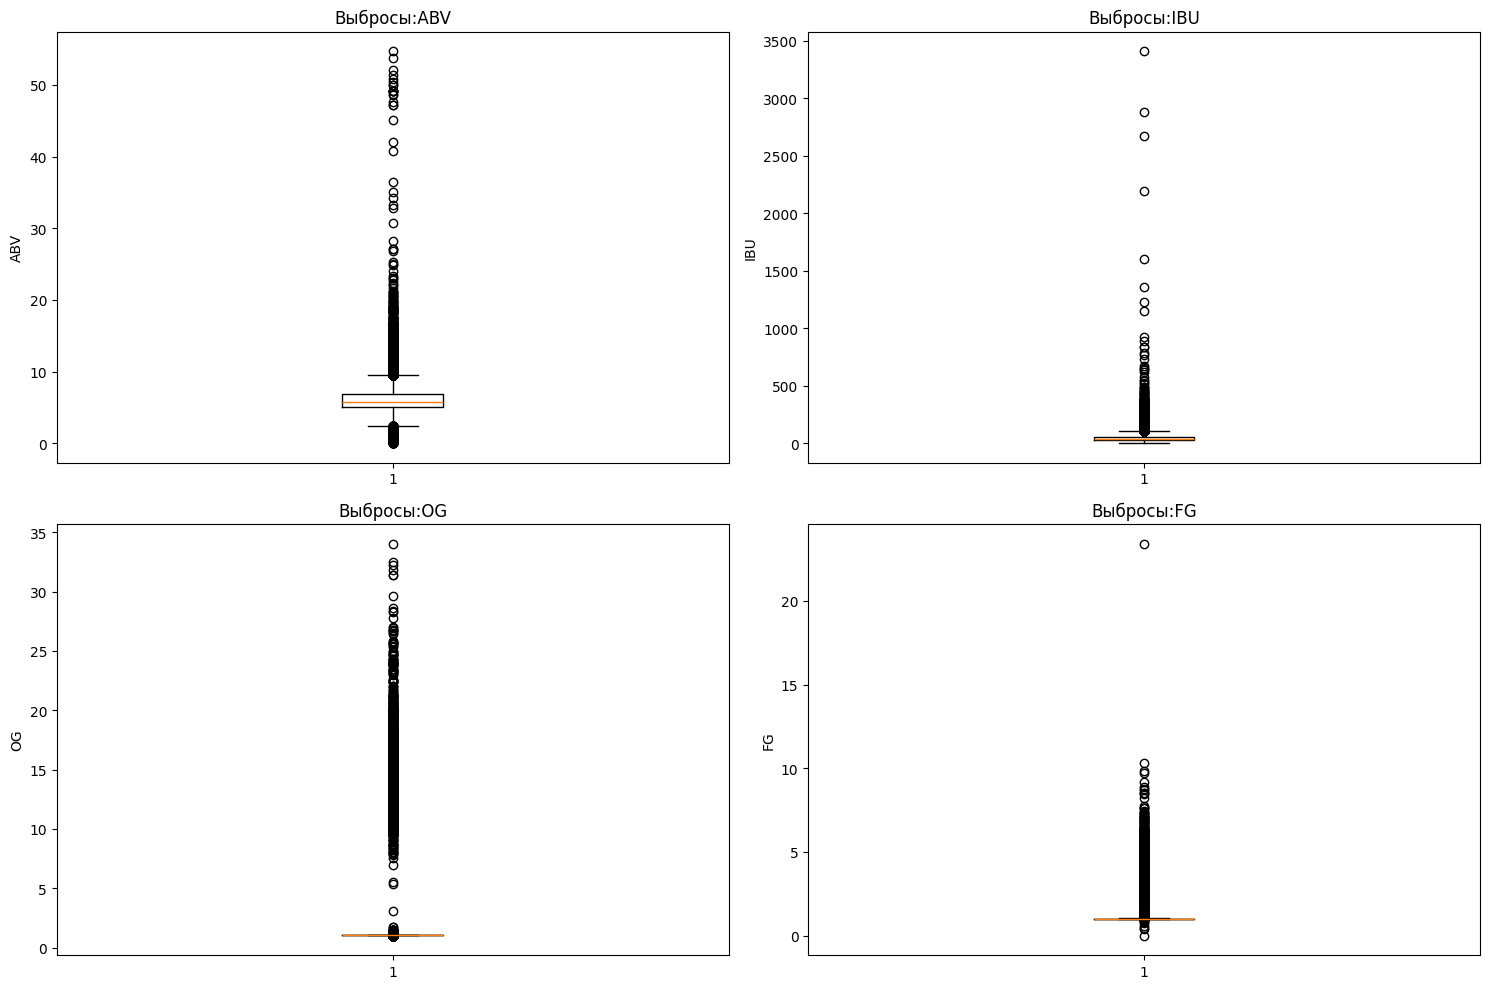

In [14]:

import numpy as np
import matplotlib.pyplot as plt

# Функция для поиска выбросов через IQR
def find_outliers(column):
    Q1 = raw_data[column].quantile(0.25)
    Q3 = raw_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = raw_data[(raw_data[column] < lower) | (raw_data[column] > upper)]
    return outliers, lower, upper

# Анализируемые колонки
columns = ['ABV', 'IBU', 'OG', 'FG', 'Color']

print("Анализ выбросов:")
# Удаляем пропуски
for col in columns:
    if col in raw_data.columns:
        clean_data = raw_data[raw_data[col].notna()]
        if len(clean_data) > 0:
            outliers, lower, upper = find_outliers(col)
            
            print(f"\n{col}:")
            print(f"  Всего записей: {len(clean_data)}")
            print(f"  Выбросов: {len(outliers)} ({len(outliers)/len(clean_data)*100:.1f}%)")
            print(f"  Границы: [{lower:.2f}, {upper:.2f}]")
            print(f"  Мин/Макс: {clean_data[col].min():.2f} / {clean_data[col].max():.2f}")
            
# топ-3 выброса
            if len(outliers) > 0:
                top_outliers = outliers.nlargest(3, col)[['Name', col]]
                for _, row in top_outliers.iterrows():
                    print(f"   {row['Name'][:40]}... = {row[col]:.2f}")

# Визуализация
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns[:4], 1):  # Первые 4 колонки
    plt.subplot(2, 2, i)
    if col in raw_data.columns:
        clean_data = raw_data[raw_data[col].notna()]
        plt.boxplot(clean_data[col])
        plt.title(f'Выбросы:{col}')
        plt.ylabel(col)

plt.tight_layout()
plt.show()

<Axes: >

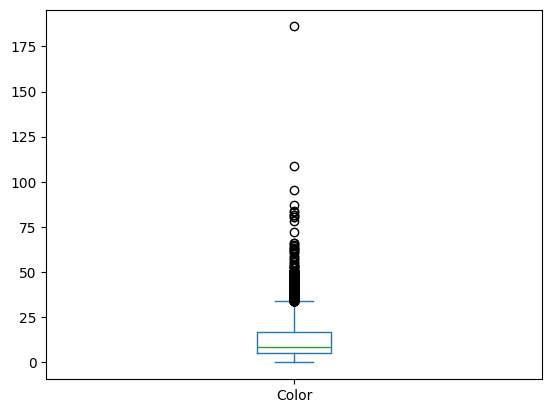

In [15]:
raw_data['Color'].plot.box()

Из визуального осмотра делаю вывод, что выбросов много, однако в случае с колонками начальной и конечной экстрактивности (OG, FG соответсвенно), цветностью Color они не критичны, так как эти показатели могут принимать достаточно большие значения. В случае с Крепостью (ABV) и горечью IBU нужно принять меры. Пиво крепостью более 15 градусов - маловероятно. Гочерь более 100 единиц не воспринимается рецепторами. В связи с этим принимаю решение удалить часть значений. Также теперь датасет сохранен как clean_data

In [16]:
# Удаление значений ABV более 20
print("ДО удаления:")
print(f"Всего записей: {len(raw_data)}")
print(f"Записей с ABV > 20: {len(raw_data[raw_data['ABV'] > 20])}")
print(f"Максимальное ABV: {raw_data['ABV'].max():.2f}%")
clean_data = raw_data[raw_data['ABV'] <= 20].copy()

print(f"\nПОСЛЕ удаления:")
print(f"Всего записей: {len(clean_data)}")
print(f"Удалено записей: {len(raw_data) - len(clean_data)}")
print(f"Максимальное ABV: {clean_data['ABV'].max():.2f}%")

ДО удаления:
Всего записей: 73861
Записей с ABV > 20: 54
Максимальное ABV: 54.72%

ПОСЛЕ удаления:
Всего записей: 73807
Удалено записей: 54
Максимальное ABV: 19.93%


In [17]:
# Удаление значений IBU более 150
print("ДО удаления:")
print(f"Всего записей: {len(raw_data)}")
print(f"Записей с IBU > 150: {len(raw_data[raw_data['IBU'] > 150])}")
print(f"Максимальное IBU: {raw_data['IBU'].max():.2f}")

clean_data = raw_data[raw_data['IBU'] <= 150].copy()

print(f"\nПОСЛЕ удаления:")
print(f"Всего записей: {len(clean_data)}")
print(f"Удалено записей: {len(raw_data) - len(clean_data)}")
print(f"Максимальное IBU: {clean_data['IBU'].max():.2f}")

ДО удаления:
Всего записей: 73861
Записей с IBU > 150: 1172
Максимальное IBU: 3409.30

ПОСЛЕ удаления:
Всего записей: 72689
Удалено записей: 1172
Максимальное IBU: 149.94


## Корреляции

Для проверки взаимосвязи характеристик построим матрицу корреляций

In [18]:
numeric_columns = clean_data.select_dtypes(include=[np.number]).columns.tolist()

print("Числовые колонки для корреляции:")
print(numeric_columns)

# Создаем матрицу корреляций только для числовых колонок
correlation_matrix = clean_data[numeric_columns].corr()

print("\nМАТРИЦА КОРРЕЛЯЦИЙ")
print("=" * 50)
print(correlation_matrix.round(3))

Числовые колонки для корреляции:
['StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency', 'PrimaryTemp']

МАТРИЦА КОРРЕЛЯЦИЙ
             StyleID  Size(L)     OG     FG    ABV    IBU  Color  BoilSize  \
StyleID        1.000   -0.007  0.002  0.007  0.007 -0.197  0.165    -0.007   
Size(L)       -0.007    1.000  0.163  0.142 -0.013 -0.037 -0.018     0.994   
OG             0.002    0.163  1.000  0.936  0.030  0.006  0.013     0.166   
FG             0.007    0.142  0.936  1.000  0.027  0.007  0.030     0.144   
ABV            0.007   -0.013  0.030  0.027  1.000  0.305  0.275    -0.010   
IBU           -0.197   -0.037  0.006  0.007  0.305  1.000  0.111    -0.035   
Color          0.165   -0.018  0.013  0.030  0.275  0.111  1.000    -0.017   
BoilSize      -0.007    0.994  0.166  0.144 -0.010 -0.035 -0.017     1.000   
BoilTime       0.079    0.046  0.033  0.030  0.114  0.077  0.060     0.052   
BoilGravity    0.002    0.177  0.968  0.9

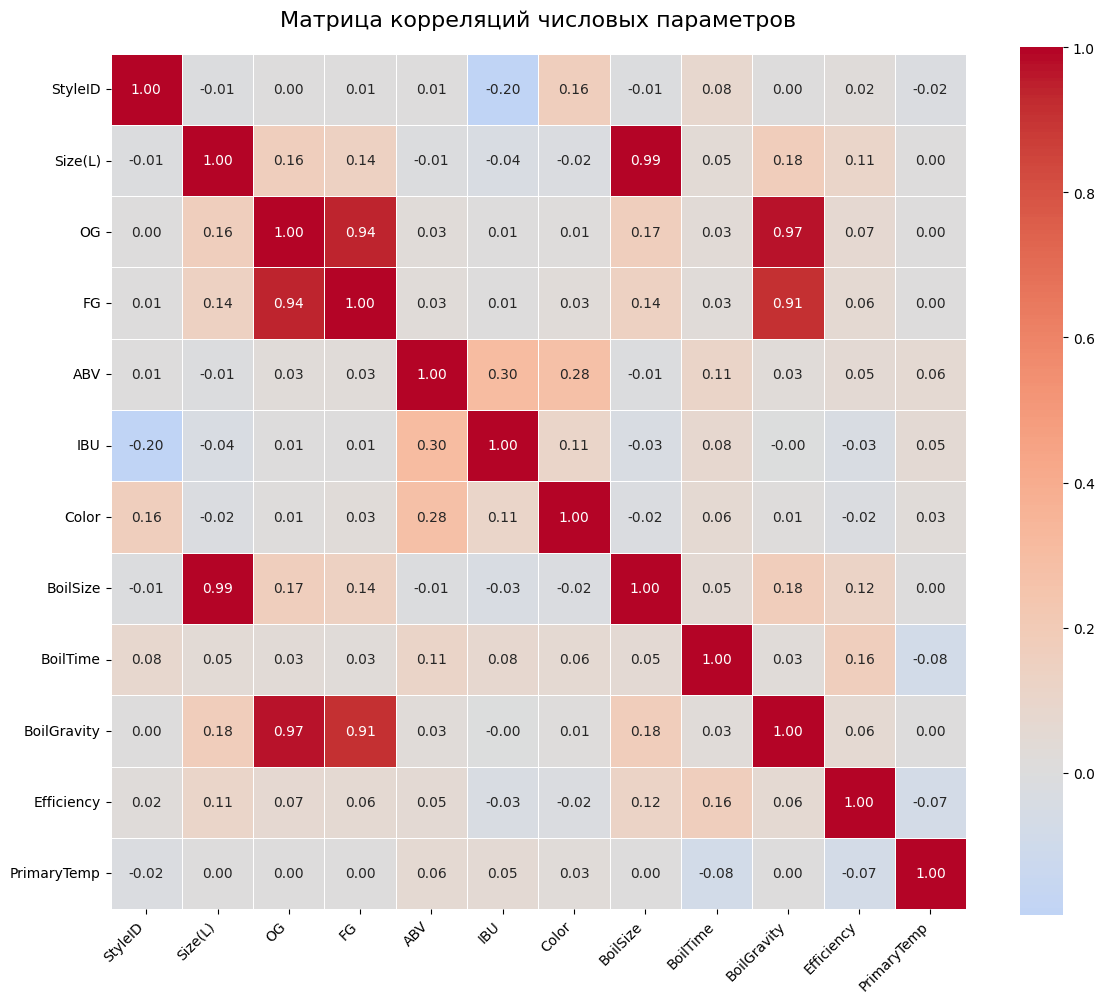

In [19]:
# Построение более читаемой матрицы
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5)

plt.title('Матрица корреляций числовых параметров', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Данные имеют очень слабую взаимосвязь. Исключения - Удельный вес сусла (BoilGravity) и экстрактивность сусла, а также Объем варки и конечный объем продукта

## Визуализация

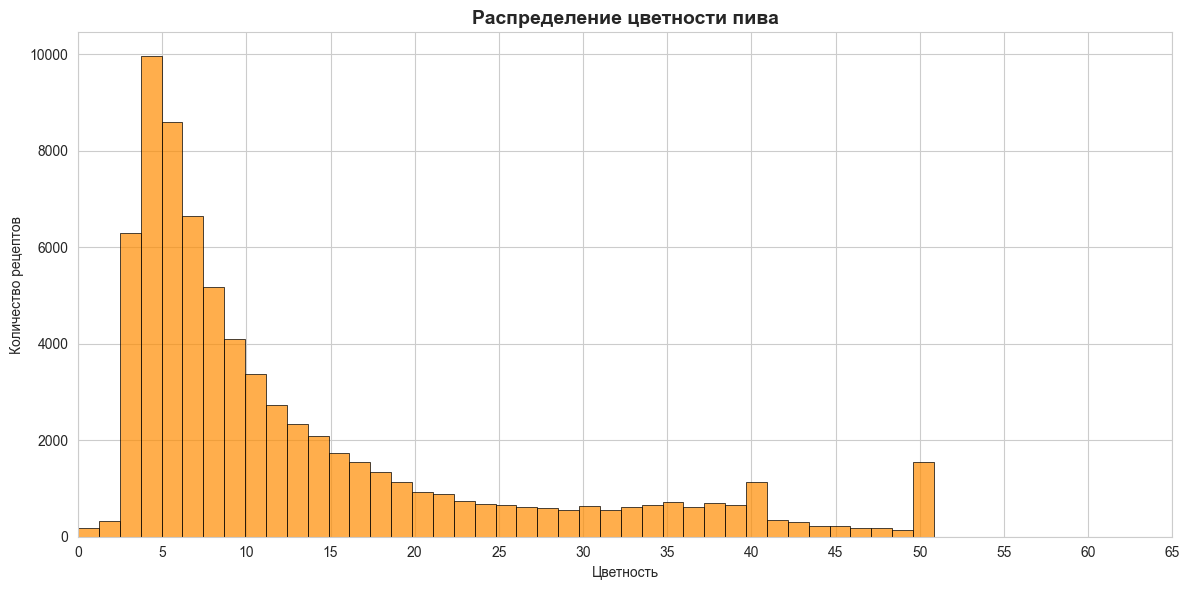

Статистика цвета пива (до 65):
Медиана: 8.4
Среднее: 13.4
Min: 0.0
Max: 64.2


In [21]:
# Настройка стиля
sns.set_style("whitegrid")
# Создаем гистограмму 
plt.figure(figsize=(12, 6))
sns.histplot(data=clean_data, x='Color', bins=150,
             color='darkorange', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.title('Распределение цветности пива', fontsize=14, fontweight='bold')
plt.xlabel('Цветность')
plt.ylabel('Количество рецептов')
# Уменьшаем шаг по оси X и обрезаем график на 65
plt.xticks(np.arange(0, 66, 5))  # Шаг 5 единиц до 65
plt.xlim(0, 65)  # Обрезаем график на значении 65
plt.tight_layout()
plt.show()
# Вывод статистики (только для данных до 65)
filtered_data = clean_data[clean_data['Color'] <= 65]
print(f"Статистика цвета пива (до 65):")
print(f"Медиана: {filtered_data['Color'].median():.1f}")
print(f"Среднее: {filtered_data['Color'].mean():.1f}") 
print(f"Min: {filtered_data['Color'].min():.1f}")
print(f"Max: {filtered_data['Color'].max():.1f}")


Среди рецептов преобладет пиво с цветоностью от 4 до 7, что может свидетельстовать о популярности светлых лагеров и элей. 

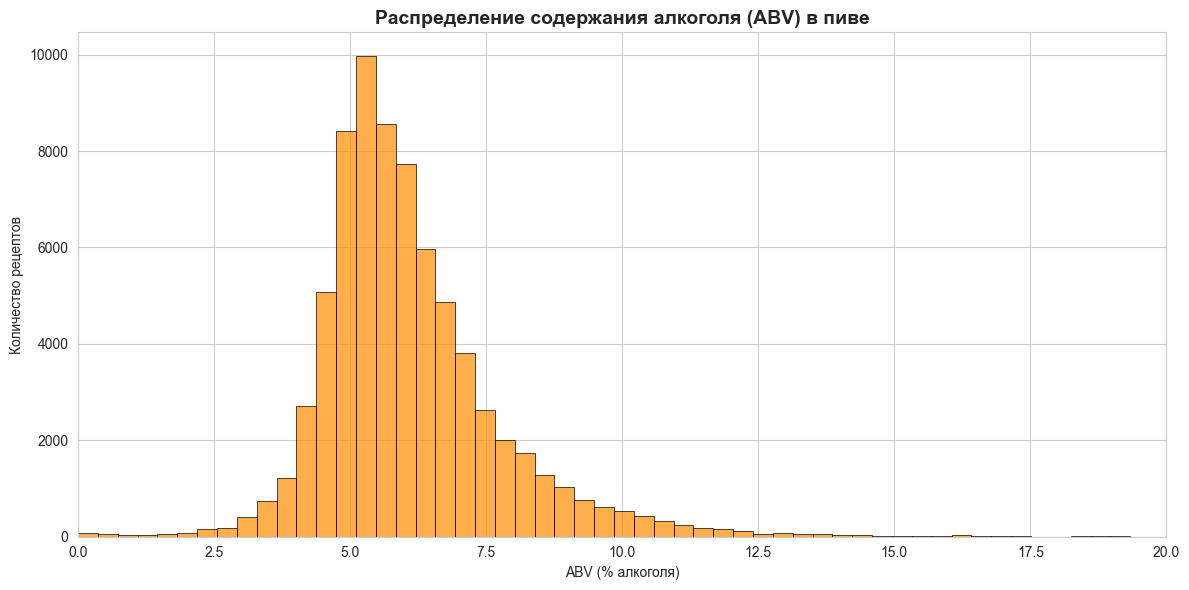

Статистика Крепости:
Медиана: 5.8
Среднее: 6.1
Min: 0.0
Max: 19.9


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Настройка стиля
sns.set_style("whitegrid")

# Создаем гистограмму ABV
plt.figure(figsize=(12, 6))
sns.histplot(data=clean_data, x='ABV', bins=150,
             color='darkorange', alpha=0.7, edgecolor='black', linewidth=0.5)

plt.title('Распределение содержания алкоголя (ABV) в пиве', 
          fontsize=14, fontweight='bold')
plt.xlabel('ABV (% алкоголя)')
plt.ylabel('Количество рецептов')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()

# Вывод статистики 
filtered_data = clean_data[clean_data['ABV'] <= 20]
print(f"Статистика Крепости:")
print(f"Медиана: {filtered_data['ABV'].median():.1f}")
print(f"Среднее: {filtered_data['ABV'].mean():.1f}") 
print(f"Min: {filtered_data['ABV'].min():.1f}")
print(f"Max: {filtered_data['ABV'].max():.1f}")



Постараемся понять, какие стили пива наиболее попоулярны у пивоваров. Для этого я решил посчитать популярные стили в столбце style и отобразить результат в виде пай чарта. Вывел 10 самых поппулярных 

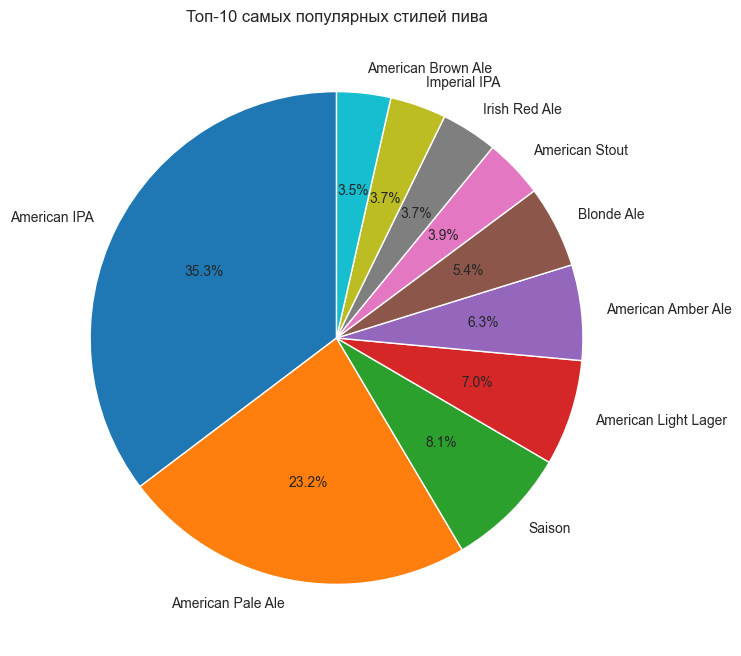

Топ-10 самых популярных стилей:
Style
American IPA            11459
American Pale Ale        7537
Saison                   2617
American Light Lager     2256
American Amber Ale       2033
Blonde Ale               1749
American Stout           1262
Irish Red Ale            1201
Imperial IPA             1195
American Brown Ale       1150
Name: count, dtype: int64


In [44]:
top_styles = clean_data['Style'].value_counts().head(10)

# Создаем круговую диаграмму
plt.figure(figsize=(10, 8))
plt.pie(top_styles.values, labels=top_styles.index, autopct='%1.1f%%', startangle=90)
plt.title('Топ-10 самых популярных стилей пива')
plt.show()

# Вывод основной информации
print("Топ-10 самых популярных стилей:")
print(top_styles)

Таким образом можно сделать вывод, что наиболее популярный стиль пива - IPA. В целом это отражает и современные тенденции. Интересно, что Наиболее часто встречается Америкаский IPA. Возможно это связано с тем, что множество пивоваров находятся на территории США, а возможно и с тем, что американские стили сейчас более популярны, так как следующим после Америкаского IPA идет также американский бледный эль. Также мне кажется интересным, что достаточно много Американского легкого лагера. Это очень питкий напиток, практически без горечи, со слабым хмелевым ароматом, освежающий. Такое пиво приятно пить летом. То есть после IPA и бледного эля идет диаметрально противоположное по своей идее пиво. 